In [1]:
import re
import numpy as np
import pandas as pd
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem.porter import *

In [2]:
data = pd.read_csv("mydata.csv")

In [3]:
data.head()

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery
1,"Did nothing for me, didn't help lost even with...",Useless,Not Effective
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture


In [4]:
newData = pd.DataFrame(data = None, columns= ["Review Text", "topic"])
newData["Review Text"] = data["Review Text"] + data["Review Title"]
newData["topic"] =  data["topic"]

In [5]:
newData.head()

,Review Text,topic
0,"Did nothing for me, didn't help lost even with...",Shipment and delivery
1,"Did nothing for me, didn't help lost even with...",Not Effective
2,I have bought these bags and immediately open...,Customer Service
3,Gave me an allergic reaction on my face :(Do n...,Allergic
4,These don't compare to the name brand wipes. F...,Texture


In [6]:
def preprocessing(data_input):
    data_input = data_input.apply(lambda x: x.lower())
    data_input = data_input.apply(lambda x: re.sub("'"           , '', x))
    data_input = data_input.apply(lambda x: re.sub("[^\w\s]"     , '', x))
    data_input = data_input.apply(lambda x: re.sub("[0-9]"       , '', x))
    data_input = data_input.apply(lambda x: x.strip())
    return data_input   

In [7]:
newData["Review Text"] = preprocessing(newData["Review Text"])

In [8]:
newData.head()

,Review Text,topic
0,did nothing for me didnt help lost even with w...,Shipment and delivery
1,did nothing for me didnt help lost even with w...,Not Effective
2,i have bought these bags and immediately open...,Customer Service
3,gave me an allergic reaction on my face do not...,Allergic
4,these dont compare to the name brand wipes fam...,Texture


In [32]:
k =newData["topic"].value_counts()

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

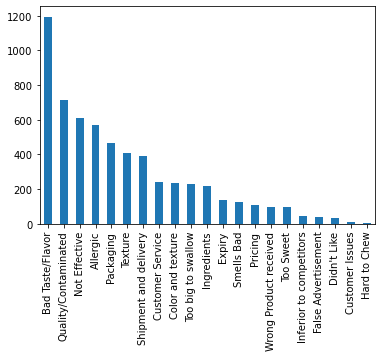

In [34]:
k.plot(kind = "bar")

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [10]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def cleanUpSentence(r):
        words = word_tokenize(r)
        filtered_sentence = []
        for w in words:
            w = lemmatizer.lemmatize(w)
            if w not in stop_words:
                filtered_sentence.append(w)
        return " ".join(filtered_sentence)

In [13]:

stemmer = PorterStemmer()
def cleanUpSentence1(data):
    words = word_tokenize(data)
    words = [w for w in words if w not in stopwords.words("english")]
    words = [stemmer.stem(w) for w in words]
    return " ".join(words)

In [14]:
newData["Review Text"] = newData["Review Text"].apply(lambda x : cleanUpSentence1(x))

In [15]:
newData["Review Text"].head()

0    noth didnt help lost even work eat healthi did...
1    noth didnt help lost even work eat healthi did...
2    bought bag immedi open one put trash bag split...
3                  gave allerg reaction face recommend
4    dont compar name brand wipe famili littl kid u...
Name: Review Text, dtype: object

In [16]:
avg_length = int(newData["Review Text"].str.encode(encoding='utf-8').str.len().mean())

In [17]:
vocab_size = 10000
sequence_length = 300

In [18]:
avg_length

174

In [19]:
vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    output_mode = 'int'
)


In [20]:
train_x = np.asarray(newData["Review Text"])
vectorize_layer.adapt(train_x)

In [21]:
len(vectorize_layer.get_vocabulary())

10548

In [22]:
len(newData["topic"].unique())

21

In [ ]:
coversion = {'Shipment and delivery': 0, 'Not Effective': 1, 'Customer Service': 2,
       'Allergic': 3, 'Texture' : 4, 'Quality/Contaminated' : 5, 'Color and texture' :6,
       'Bad Taste/Flavor' : 7, 'Too big to swallow' : 8, 'Smells Bad' : 9,
       'Too Sweet' : 10, 'Ingredients' : 11, 'Expiry' : 12, 'Packaging': 13,
       'Wrong Product received' : 14, 'Pricing' : 15, 'False Advertisement' : 16,
       'Inferior to competitors': 17, "Didn't Like": 18, 'Customer Issues': 19,
       'Hard to Chew' : 20 }

In [ ]:
newData["topic"] = newData["topic"].replace(coversion)

In [ ]:
newData

In [ ]:
num_classes = len(newData["topic"].unique())

In [ ]:
num_classes

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newData["Review Text"], newData["topic"], test_size=0.2, random_state=99)

In [24]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=256,
        mask_zero=True
),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,  return_sequences=False)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
])

In [ ]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=len(vectorize_layer.get_vocabulary()),output_dim=256,mask_zero=True),
    tf.keras.layers.GRU(256,  return_sequences=True),
    tf.keras.layers.GRU(256,  return_sequences=False),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(21, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [26]:
model.fit(
    X_train,y_train,
    epochs=15)

Epoch 1/15


UnimplementedError:  Cast string to float is not supported
	 [[node sparse_categorical_crossentropy/Cast (defined at <ipython-input-26-f0a54644d6d4>:1) ]] [Op:__inference_train_function_4952]

Function call stack:
train_function


In [ ]:
z = model.predict(["These don't compare to the name brand wipes. Family of 5 little kids, we use a lot of wipes. These don't cut through sticky messes and they're small and very thin. Might be ok for wiping down less often used places but not good at tackling actual messes. I also didn't care for the lemon scent, felt it was too strong. Can't tackle big messes"])

In [ ]:
z

In [ ]:
type(z)

In [ ]:
np.argmax(z)

In [ ]:
np.set_printoptions(suppress=True)